In [161]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams["figure.figsize"]=15,6
from datetime import datetime
from pmdarima.arima import auto_arima

In [163]:
# ALERTA: Dados Fictícios
dados=pd.read_csv("Consumo_Energia_RJ_Mensal_2024.csv")
dados.dtypes

Data                       object
Mes                         int64
Consumo_de_Energia_GWh    float64
dtype: object

In [165]:
# Definindo a coluna "Data" como índice do Dataset.
dados['Data'] = pd.to_datetime(dados['Data'])
dados.set_index('Data', inplace=True)
dados.head()

,Mes,Consumo_de_Energia_GWh
Data,,
2023-01-01,1,724.835708
2023-02-01,2,693.086785
2023-03-01,3,732.384427
2023-04-01,4,776.151493
2023-05-01,5,688.292331


In [167]:
dados.dtypes

Mes                         int64
Consumo_de_Energia_GWh    float64
dtype: object

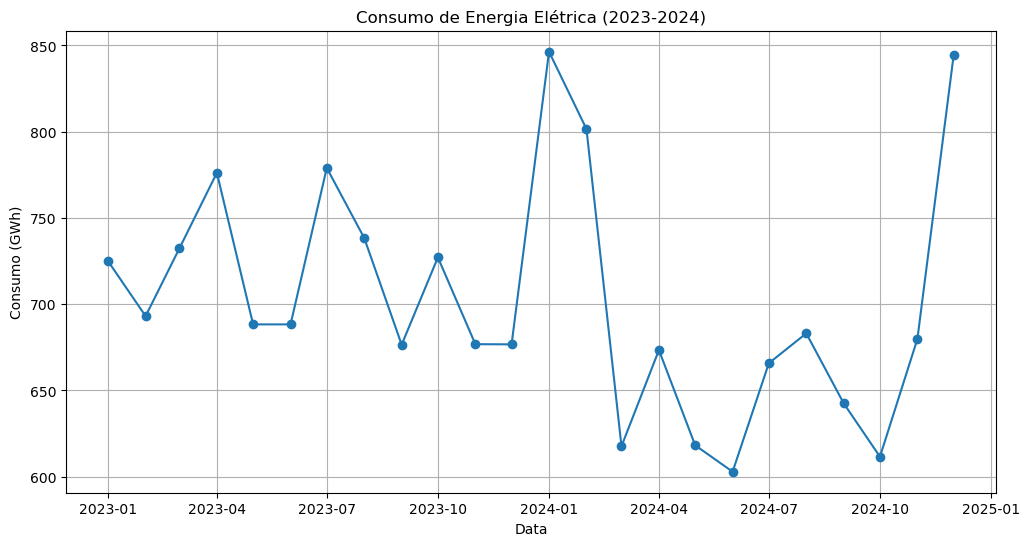

In [169]:
plt.figure(figsize=(12, 6))
plt.plot(dados['Consumo_de_Energia_GWh'], marker='o')
plt.title('Consumo de Energia Elétrica (2023-2024)')
plt.xlabel('Data')
plt.ylabel('Consumo (GWh)')
plt.grid(True)
plt.show()

In [171]:
# Criando um Modelo de Previsão ARIMA Sazonal.
modelo = auto_arima(dados['Consumo_de_Energia_GWh'], seasonal=True, m=6, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[6] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,0,0)(0,1,0)[6] intercept   : AIC=217.090, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[6] intercept   : AIC=215.584, Time=0.09 sec
 ARIMA(0,0,1)(0,1,1)[6] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,0)(0,1,0)[6]             : AIC=215.301, Time=0.01 sec
 ARIMA(0,0,0)(1,1,0)[6] intercept   : AIC=217.766, Time=0.05 sec
 ARIMA(0,0,0)(0,1,1)[6] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,0,0)(1,1,1)[6] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(1,0,0)(0,1,0)[6] intercept   : AIC=214.726, Time=0.03 sec
 ARIMA(1,0,0)(0,1,1)[6] intercept   : AIC=214.928, Time=0.07 sec
 ARIMA(1,0,0)(1,1,1)[6] intercept   : AIC=216.875, Time=0.10 sec
 ARIMA(2,0,0)(0,1,0)[6] intercept   : AIC=215.880, Time=0.06 sec
 ARIMA(1,0,1)(0,1,0)[6] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,0,1)(0,1,0)[6] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(2,0,1)(0,1,0)[6] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(1,0

In [172]:
# Exibe um resumo completo do Modelo Arima.
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   24
Model:             SARIMAX(1, 0, 1)x(0, 1, [], 6)   Log Likelihood                -101.965
Date:                            Sat, 04 Jan 2025   AIC                            209.929
Time:                                    20:45:42   BIC                            212.600
Sample:                                01-01-2023   HQIC                           210.297
                                     - 12-01-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0579      0.271      0.214      0.831      -0.473       0.588
ma.L1          0.9862      1.488      0.663      0.508      -1.931       3.903
sigma2      4161.7981   5758.819      0.723      0.470   -7125.280    1.54e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.26
Prob(Q):                              0.86   Prob(JB):                         0.88
Heteroskedasticity (H):              10.84   Skew:                            -0.14
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

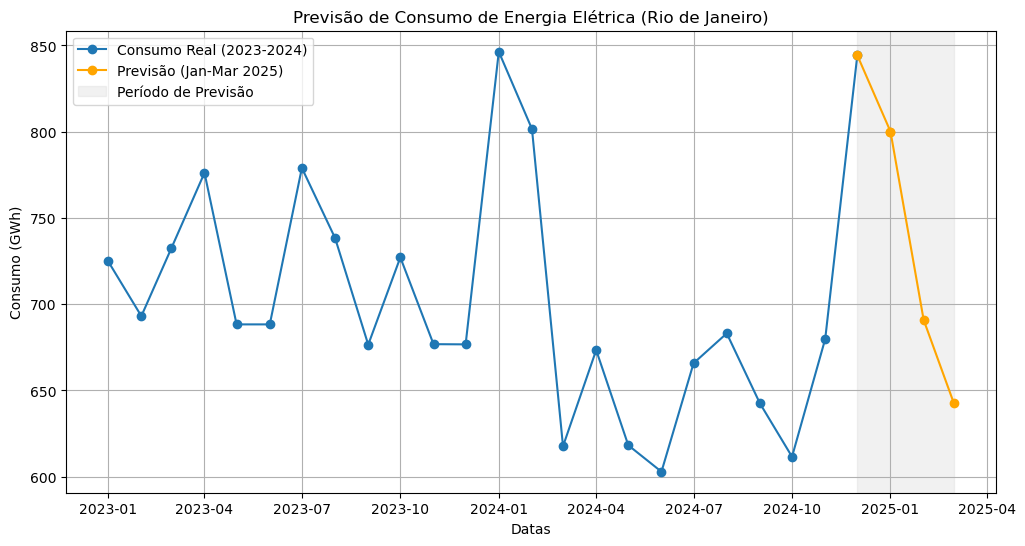

In [173]:
# Usa o Modelo Arima criado, para fazer a previsão dos próximos 3 meses.
previsao = modelo.predict(n_periods=3)
previsao_datas = pd.date_range(start='2025-01-01', periods=3, freq='MS')
previsao_series = pd.Series(forecast, index=previsao_datas)

# Combina os dados do Dataset com os dados da previsão para gerar um gráfico.
dados_concat = pd.concat([dados['Consumo_de_Energia_GWh'], previsao_series])

plt.figure(figsize=(12, 6))
plt.plot(dados_concat[:'2024-12-01'], label='Consumo Real (2023-2024)', marker='o', linestyle='-')

plt.plot(dados_concat['2024-12-01':'2025-01-01'], marker='o', color='orange', linestyle='-')

plt.plot(dados_concat['2025-01-01':], label='Previsão (Jan-Mar 2025)', marker='o', linestyle='-', color='orange')

plt.axvspan('2024-12-01', '2025-03-01', color='lightgray', alpha=0.3, label='Período de Previsão')

plt.title('Previsão de Consumo de Energia Elétrica (Rio de Janeiro)')
plt.xlabel('Datas')
plt.ylabel('Consumo (GWh)')
plt.legend()
plt.grid(True)
plt.show()

In [177]:
# Exibe o resultado das previsões feitas com o Modelo Arima.
previsao_series

2025-01-01    800.078224
2025-02-01    690.867731
2025-03-01    642.968330
Freq: MS, dtype: float64